# imports

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn
import pandas.io.data as web

%matplotlib inline

import datetime
import inspect

start = datetime.datetime(1990, 1, 1)
end = datetime.datetime.today()

# data 

In [84]:
digits = sklearn.datasets.load_digits()
inflation = web.DataReader(["CPIAUCSL", "CPILFESL"], "fred", start, end)
ip = web.DataReader("5_Industry_Portfolios", "famafrench")

In [95]:
def fidb(instrs, differencing=1):
    instrs_frame = pd.concat([web.DataReader(instr, 'google', start = start)['Close'] for instr in instrs], axis=1)
    for d in xrange(differencing):
        instrs_frame = instrs_frame.pct_change()
    instrs_frame.columns = instrs
    return instrs_frame


In [109]:
z = fidb(['VTI', 'FSTMX'])

IOError: after 3 tries, Google did not return a 200 for url 'http://www.google.com/finance/historical?q=FSTMX&startdate=Jan+01%2C+1990&enddate=Apr+17%2C+2016&output=csv'

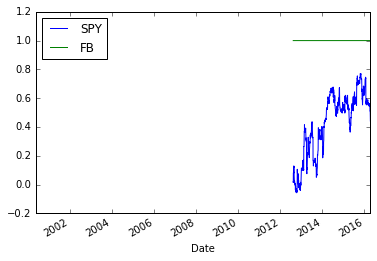

In [128]:
(pd.rolling_corr(z, 250/4)).major_xs('FB').T.plot()